In [1]:
# import libraries
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, BatchNormalization
from keras.wrappers.scikit_learn import KerasRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston

import matplotlib.pyplot as plt
import seaborn as sns

Using TensorFlow backend.
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
#from モジュール名 import クラス名（もしくは関数名や変数名）
from pandas import DataFrame

# load dataset 
boston = load_boston()
%matplotlib inline
df = DataFrame(data=boston.data, columns = boston.feature_names)
# 目的変数をDataFrameへ追加
df['PRICE'] = np.array(boston.target)

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
def sig_reg_model():
    model = Sequential()
    model.add(Dense(100, input_dim=1, activation='sigmoid'))
    model.add(Dense(100, activation='sigmoid'))
    model.add(Dense(100, activation='sigmoid'))
    model.add(Dense(100, activation='sigmoid'))
    model.add(Dense(100, activation='sigmoid'))
#     model.add(Dense(100, activation='sigmoid'))
#     model.add(Dense(100, activation='sigmoid'))
#     model.add(Dense(100, activation='sigmoid'))
#     model.add(Dense(100, activation='sigmoid'))
    model.add(Dense(1))

    # compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [29]:
def relu_reg_model():
    model = Sequential()
    model.add(Dense(10, input_dim=1, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='linear'))
#     model.add(Dense(100, activation='relu'))
#     model.add(Dense(100, activation='relu'))
#     model.add(Dense(100, activation='relu'))
#     model.add(Dense(100, activation='relu'))
    model.add(Dense(1))

    # compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [30]:
# 説明変数
data2 = df.loc[:, 'RM'].values
# 目的変数
target2 = df.loc[:, 'PRICE'].values

In [31]:
x_train, x_test, y_train, y_test = train_test_split(data2, target2, test_size=0.1, random_state=0)

In [32]:
from keras.callbacks import EarlyStopping, TensorBoard, ModelCheckpoint

cb_cp = ModelCheckpoint('./out/checkpoints/weights.{epoch:02d}-{val_loss:.2f}.hdf5', verbose=1, save_weights_only=True)
cb_tf  = TensorBoard(log_dir='./out/tensorBoard', histogram_freq=0)

In [33]:
# use data split and fit to run the model
estimator = KerasRegressor(build_fn=relu_reg_model, epochs=300, batch_size=20, verbose=1)

history = estimator.fit(x_train, y_train, callbacks=[cb_cp, cb_tf], validation_data=(x_test, y_test))

y_pred = estimator.predict(x_train)

Train on 455 samples, validate on 51 samples
Epoch 1/300
455/455 [==============================] - 1s 3ms/step - loss: 767.3078 - val_loss: 70.6794

Epoch 00001: saving model to ./out/checkpoints/weights.01-70.68.hdf5
Epoch 2/300
455/455 [==============================] - 1s 3ms/step - loss: 93.3708 - val_loss: 97.9865

Epoch 00002: saving model to ./out/checkpoints/weights.02-97.99.hdf5
Epoch 3/300
455/455 [==============================] - 1s 3ms/step - loss: 72.0864 - val_loss: 75.4377

Epoch 00003: saving model to ./out/checkpoints/weights.03-75.44.hdf5
Epoch 4/300
455/455 [==============================] - 1s 3ms/step - loss: 62.4750 - val_loss: 72.5899

Epoch 00004: saving model to ./out/checkpoints/weights.04-72.59.hdf5
Epoch 5/300
455/455 [==============================] - 1s 3ms/step - loss: 61.9493 - val_loss: 73.4948

Epoch 00005: saving model to ./out/checkpoints/weights.05-73.49.hdf5
Epoch 6/300
455/455 [==============================] - 2s 3ms/step - loss: 61.4977 - val_

Epoch 48/300
455/455 [==============================] - 1s 3ms/step - loss: 40.6710 - val_loss: 65.8133

Epoch 00048: saving model to ./out/checkpoints/weights.48-65.81.hdf5
Epoch 49/300
455/455 [==============================] - 1s 3ms/step - loss: 41.6215 - val_loss: 61.6899

Epoch 00049: saving model to ./out/checkpoints/weights.49-61.69.hdf5
Epoch 50/300
455/455 [==============================] - 1s 3ms/step - loss: 40.0068 - val_loss: 64.5072

Epoch 00050: saving model to ./out/checkpoints/weights.50-64.51.hdf5
Epoch 51/300
455/455 [==============================] - 1s 3ms/step - loss: 42.5573 - val_loss: 62.9094

Epoch 00051: saving model to ./out/checkpoints/weights.51-62.91.hdf5
Epoch 52/300
455/455 [==============================] - 1s 3ms/step - loss: 42.0596 - val_loss: 66.0389

Epoch 00052: saving model to ./out/checkpoints/weights.52-66.04.hdf5
Epoch 53/300
455/455 [==============================] - 1s 3ms/step - loss: 49.8869 - val_loss: 61.3111

Epoch 00053: saving model

Epoch 142/300
455/455 [==============================] - 1s 3ms/step - loss: 40.2975 - val_loss: 59.2909

Epoch 00142: saving model to ./out/checkpoints/weights.142-59.29.hdf5
Epoch 143/300
455/455 [==============================] - 1s 3ms/step - loss: 40.3228 - val_loss: 57.0960

Epoch 00143: saving model to ./out/checkpoints/weights.143-57.10.hdf5
Epoch 144/300
455/455 [==============================] - 1s 3ms/step - loss: 34.8779 - val_loss: 55.3319

Epoch 00144: saving model to ./out/checkpoints/weights.144-55.33.hdf5
Epoch 145/300
455/455 [==============================] - 1s 3ms/step - loss: 37.2664 - val_loss: 64.0176

Epoch 00145: saving model to ./out/checkpoints/weights.145-64.02.hdf5
Epoch 146/300
455/455 [==============================] - 1s 3ms/step - loss: 38.3797 - val_loss: 58.2831

Epoch 00146: saving model to ./out/checkpoints/weights.146-58.28.hdf5
Epoch 147/300
455/455 [==============================] - 1s 3ms/step - loss: 36.5438 - val_loss: 56.1614

Epoch 00147: s


Epoch 00188: saving model to ./out/checkpoints/weights.188-62.39.hdf5
Epoch 189/300
455/455 [==============================] - 1s 3ms/step - loss: 40.8819 - val_loss: 60.1641

Epoch 00189: saving model to ./out/checkpoints/weights.189-60.16.hdf5
Epoch 190/300
455/455 [==============================] - 1s 3ms/step - loss: 40.7530 - val_loss: 55.3849

Epoch 00190: saving model to ./out/checkpoints/weights.190-55.38.hdf5
Epoch 191/300
455/455 [==============================] - 1s 3ms/step - loss: 34.7214 - val_loss: 58.1665

Epoch 00191: saving model to ./out/checkpoints/weights.191-58.17.hdf5
Epoch 192/300
455/455 [==============================] - 1s 3ms/step - loss: 38.2772 - val_loss: 61.6215

Epoch 00192: saving model to ./out/checkpoints/weights.192-61.62.hdf5
Epoch 193/300
455/455 [==============================] - 1s 3ms/step - loss: 36.4997 - val_loss: 64.1091

Epoch 00193: saving model to ./out/checkpoints/weights.193-64.11.hdf5
Epoch 194/300
455/455 [==========================

455/455 [==============================] - 2s 4ms/step - loss: 35.5594 - val_loss: 57.6442

Epoch 00235: saving model to ./out/checkpoints/weights.235-57.64.hdf5
Epoch 236/300
455/455 [==============================] - 2s 3ms/step - loss: 38.8685 - val_loss: 61.5474

Epoch 00236: saving model to ./out/checkpoints/weights.236-61.55.hdf5
Epoch 237/300
455/455 [==============================] - 1s 3ms/step - loss: 34.6429 - val_loss: 55.1286

Epoch 00237: saving model to ./out/checkpoints/weights.237-55.13.hdf5
Epoch 238/300
455/455 [==============================] - 1s 3ms/step - loss: 37.6883 - val_loss: 55.3020

Epoch 00238: saving model to ./out/checkpoints/weights.238-55.30.hdf5
Epoch 239/300
455/455 [==============================] - 1s 3ms/step - loss: 35.2298 - val_loss: 55.0674

Epoch 00239: saving model to ./out/checkpoints/weights.239-55.07.hdf5
Epoch 240/300
455/455 [==============================] - 1s 3ms/step - loss: 35.2355 - val_loss: 58.1139

Epoch 00240: saving model to

Epoch 282/300
455/455 [==============================] - 1s 3ms/step - loss: 36.6477 - val_loss: 55.1378

Epoch 00282: saving model to ./out/checkpoints/weights.282-55.14.hdf5
Epoch 283/300
455/455 [==============================] - 1s 3ms/step - loss: 34.7765 - val_loss: 54.8683

Epoch 00283: saving model to ./out/checkpoints/weights.283-54.87.hdf5
Epoch 284/300
455/455 [==============================] - 1s 3ms/step - loss: 33.5593 - val_loss: 55.3020

Epoch 00284: saving model to ./out/checkpoints/weights.284-55.30.hdf5
Epoch 285/300
455/455 [==============================] - 1s 3ms/step - loss: 33.5863 - val_loss: 54.5780

Epoch 00285: saving model to ./out/checkpoints/weights.285-54.58.hdf5
Epoch 286/300
455/455 [==============================] - 1s 3ms/step - loss: 35.6025 - val_loss: 59.7436

Epoch 00286: saving model to ./out/checkpoints/weights.286-59.74.hdf5
Epoch 287/300
455/455 [==============================] - 1s 3ms/step - loss: 37.4733 - val_loss: 56.9669

Epoch 00287: s

In [34]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(df.loc[:,['RM']].values, df.loc[:,'PRICE'].values)

y_predicted = lr.predict(df.loc[:,['RM']].values)

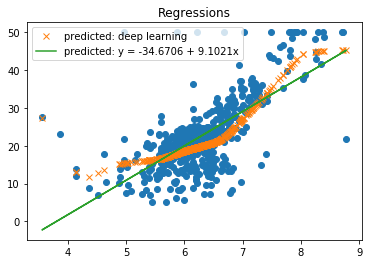

In [35]:
plt.title('Regressions')
plt.plot(df.loc[:,['RM']].values, df.loc[:,'PRICE'].values, 'o')
plt.plot(x_train, y_pred, 'x', label='predicted: deep learning')
plt.plot(df.loc[:,['RM']].values, y_predicted, label='predicted: y = %.4f + %.4fx' % (lr.intercept_, lr.coef_))
plt.legend(loc=2)

In [36]:
history.history.keys()

dict_keys(['val_loss', 'loss'])

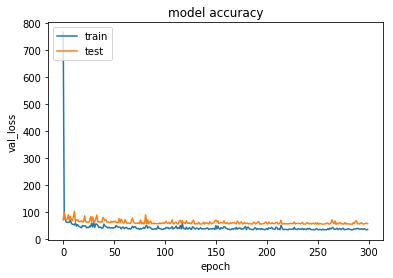

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('val_loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [38]:
#モデルのロード

model = Sequential()
model.add(Dense(10, input_dim=1, activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dense(1))

# compile model
model.compile(loss='mean_squared_error', optimizer='adam')
model.load_weights('./out/checkpoints/weights.10-69.63.hdf5')

In [39]:
#モデル性能評価の時間あれば

In [41]:
# # use data split and fit to run the model
# x_train, x_test, y_train, y_test = train_test_split(data2, target2, test_size=0, random_state=0)
# estimator = KerasRegressor(build_fn=reg_model, epochs=100, batch_size=10, verbose=0)
# estimator.fit(x_train, y_train)
# y_pred = estimator.predict(x_test)

# # show its root mean square error
# mse = mean_squared_error(y_test, y_pred)
# print("KERAS REG RMSE : %.2f" % (mse ** 0.5))